In [1]:
import os
import time
import torch
import math
import torchvision
from torchvision import transforms as transforms
from torch import nn
from torch.nn import functional as F
from math import cos,pi

import matplotlib.pyplot as plt
import numpy as np
import random

torch.cuda.empty_cache()

In [2]:
torch.cuda.is_available()

True

In [3]:
# torch.manual_seed(17)

# class HaS(object): 
# #     def __init__(self):
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         # possible grid size, 0 means no hiding
#         grid_size=3

#         # hiding probability
#         hide_prob = 0.1
 
#         # randomly choose one grid size
# #         grid_size= grid_sizes[random.randint(0,len(grid_sizes)-1)]

#         # hide the patches
#         if(grid_size>0):
#              for x in range(0,wd,grid_size):
#                  for y in range(0,ht,grid_size):
#                      x_end = min(wd, x+grid_size)  
#                      y_end = min(ht, y+grid_size)
#                      if(random.random() <=  hide_prob):
#                            img_[x:x_end,y:y_end,:]=0

#         return img_
    
# torch.manual_seed(17)

        
# class HideEdge(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[x_end:,y_end:,:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:hide_size,:hide_size,:]=0
# #         img_[x_end:,:,:]=0
# #         img_[:,y_end:,:]=0
# #         img_[:hide_size,:,:]=0
# #         img_[:,:hide_size,:]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_

   
# class Hide_after_Norm(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img_):
#         # get width and height of the image
# #         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[1]
#         ht = s[2]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size
        
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[:,x_end:,y_end:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:,:hide_size,:hide_size]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_
    
    

# # torch.cuda.manual_seed(17) # for GPU
# aug_train = transforms.Compose([
#     transforms.RandomHorizontalFlip(), # 水平翻转
# #     torchvision.transforms.CenterCrop(26),
# #     HideEdge(),
#     torchvision.transforms.RandomRotation(15),
# #     torchvision.transforms.CenterCrop(28),
#     # transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5), # color aug
# #     transforms.RandomCrop(32, padding=4), # 裁剪
#     # transforms.RandomResizedCrop((32,32),scale=(0.1,1),ratio=(0.5,2))
# #     hide_patch(),
# #     HaS(),
# #     HideEdge(2),
#     transforms.ToTensor(),
# #     Norm(2),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)),# normalization
#     Hide_after_Norm(2)
#     ])

# aug_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)), # normalization
#     Hide_after_Norm(2)
#     ])

# trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)
# # testdata = torchvision.datasets.CIFAR10('./CIFAR10',train=False,download=True,transform=transforms.ToTensor())
# # print(len(trainingdata),len(testdata))

In [4]:
torch.manual_seed(17)
torch.cuda.manual_seed_all(17)

aug_train = transforms.Compose([
    transforms.RandomCrop(32,padding=4,padding_mode='reflect'),
    transforms.RandomHorizontalFlip(), # 水平翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

aug_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)

Files already downloaded and verified


In [5]:
def load_data(is_train,aug,batch_size):
    dataset = torchvision.datasets.CIFAR10('./CIFAR10',train=is_train,download=True,transform=aug)
    dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train)
    return dataloader

batch_size = 256 # param
trainDataLoader = load_data(is_train=True,aug=aug_train,batch_size=batch_size)
testDataLoader = load_data(is_train=False,aug=aug_test,batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) 6


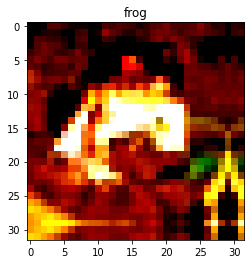

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

image,label = trainingdata[0]
print(image.shape, label)

%matplotlib inline
plt.imshow(image.numpy().transpose(1,2,0))
plt.title(str(classes[label]))
plt.show()

In [7]:
class BasicBlock(nn.Module):

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        if in_planes == 64:
            self.conv1 = nn.Conv2d(
                in_planes, planes, kernel_size=5, stride=stride, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)
        else:
            self.conv1 = nn.Conv2d(
                in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if in_planes == 64:
             self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=3, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
                )
        elif stride != 1 or in_planes != planes:
            if in_planes == 128:
                self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
                )
            else:
                self.shortcut = nn.Sequential(
                    nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
                )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out



class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(256, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
#         print(x.shape)
        out = F.relu(self.bn1(self.conv1(x)))
#         print(out.shape)
        out = self.layer1(out)
#         print(out.shape)
        out = self.layer2(out)
#         print(out.shape)
        out = self.layer3(out)
#         print(out.shape)
#         out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
#         print(out.shape)
        out = out.view(out.size(0), -1)
#         print(out.shape)
        out = self.linear(out)
        return out
    
    def init_weights(self):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):
                nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu') # weight initialization
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.BatchNorm2d):
                nn.init.constant_(m.weight,1)
                nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,std=1e-3)
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)

def project1_model():
#     return ResNet(BasicBlock, [2, 2, 2, 2])
    return ResNet(BasicBlock, [3, 3, 3])

# model1 = nn.Sequential(project1_model(), nn.AdaptiveAvgPool2d((1,1)), nn.Flatten(), nn.Linear(512, 10)).cuda()
model1 = project1_model().cuda()
model1.init_weights()

In [8]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    # torch.numel() returns number of elements in a tensor

print(count_parameters(model1))

4831946


In [9]:
# X = torch.rand(size=(1, 3, 32, 32)).cuda()
# for layer in model1:
#   X = layer(X)
#   print(layer.__class__.__name__,'output shape:\t', X.shape)

In [10]:
def adjust_learning_rate(optimizer, current_epoch,max_epoch,lr_min=0,lr_max=0.1,warmup=True):
    warmup_epoch = 10 if warmup else 0
    if current_epoch < warmup_epoch:
        lr = lr_max * current_epoch / warmup_epoch
    else:
        lr = lr_min + (lr_max-lr_min)*(1 + cos(pi * (current_epoch - warmup_epoch) / (max_epoch - warmup_epoch))) / 2
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [11]:
num_epochs = 500 # param
epoch_start = 0
path = 'batch_256_lr_0.1-0.0003_no_crop_kernel_5.pt'

train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

Loss = torch.nn.CrossEntropyLoss()

lr = 0.1
lr_min=0.0003
momentum = 0.9
nesterov = True
optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=momentum,nesterov=nesterov)



if os.path.exists(path):
    checkpoint = torch.load(path)
    print('Read model from checkpoint')
    model1.cuda().load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch_start = checkpoint['epoch']
    Loss = checkpoint['Loss']
    train_loss_history = checkpoint['train_loss_history']
    test_loss_history = checkpoint['test_loss_history']
    train_accuracy_history = checkpoint['train_accuracy_history']
    test_accuracy_history = checkpoint['test_accuracy_history']
    print('Restart from epoch',epoch_start)
    

for epoch in range(epoch_start+1, num_epochs+1):
    timestart = time.time()

    train_loss = 0.0
    test_loss = 0.0
    train_accuracy = 0.0
    test_accuracy = 0.0

    for i, data in enumerate(trainDataLoader):
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        predicted_output = model1.cuda()(images)
        fit = Loss(predicted_output,labels)
        fit.backward()
        adjust_learning_rate(optimizer=optimizer,current_epoch=epoch,max_epoch=num_epochs,lr_min=lr_min,lr_max=lr,warmup=True)
        optimizer.step()
        train_loss += fit.item()
        train_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()

    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            predicted_output = model1.cuda()(images)
            fit = Loss(predicted_output,labels)
            test_loss += fit.item()
            test_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()


    train_loss = train_loss/len(trainDataLoader)
    test_loss = test_loss/len(testDataLoader)
    train_accu = train_accuracy/len(trainDataLoader)
    test_accu = test_accuracy/len(testDataLoader)
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    train_accuracy_history.append(train_accu)
    test_accuracy_history.append(test_accu)
    print('Epoch %s, Train loss %s, Test loss %s, Train accuracy %s, Test accuracy %s, Cost %s s'%(epoch,
                                                                                                   train_loss,test_loss,
                                                                                                   train_accu,test_accu,
                                                                                                   time.time()-timestart))

    if epoch % 5 == 0 and epoch != 0:
        torch.save({'epoch':epoch,
          'model_state_dict':model1.cuda().state_dict(),
          'optimizer_state_dict':optimizer.state_dict(),
          'Loss':Loss,
          'train_loss_history':train_loss_history,
          'test_loss_history':test_loss_history,
          'train_accuracy_history':train_accuracy_history,
          'test_accuracy_history':test_accuracy_history},path)
        print('Model saved in epoch %s'%(epoch))

Epoch 1, Train loss 1.6750909740827522, Test loss 1.3276152223348618, Train accuracy 36.43614477040816, Test accuracy 50.1171875, Cost 49.25025129318237 s
Epoch 2, Train loss 1.193044432571956, Test loss 1.04069292396307, Train accuracy 56.930404993952536, Test accuracy 62.890625, Cost 48.304694175720215 s
Epoch 3, Train loss 0.9251689621988608, Test loss 0.7740900248289109, Train accuracy 67.28555484693878, Test accuracy 72.83203125, Cost 48.37573218345642 s
Epoch 4, Train loss 0.7546031177043915, Test loss 0.6786272987723351, Train accuracy 73.59494579081633, Test accuracy 76.669921875, Cost 48.3462336063385 s
Epoch 5, Train loss 0.6501515767708117, Test loss 0.6295303702354431, Train accuracy 77.6124043367347, Test accuracy 78.701171875, Cost 48.26530647277832 s
Model saved in epoch 5
Epoch 6, Train loss 0.5822332547027238, Test loss 0.5505229361355305, Train accuracy 79.83856823979592, Test accuracy 81.201171875, Cost 48.26987957954407 s
Epoch 7, Train loss 0.5277268476023966, Test

Epoch 52, Train loss 0.041250338010508945, Test loss 0.35557025521993635, Train accuracy 98.52598852040816, Test accuracy 91.4453125, Cost 48.80534386634827 s
Epoch 53, Train loss 0.03962150899389265, Test loss 0.39201517775654793, Train accuracy 98.67984693877551, Test accuracy 91.3671875, Cost 48.80908703804016 s
Epoch 54, Train loss 0.04046218692115983, Test loss 0.4058394532650709, Train accuracy 98.59972895408163, Test accuracy 91.220703125, Cost 48.780025005340576 s
Epoch 55, Train loss 0.04094405654504211, Test loss 0.3734743375331163, Train accuracy 98.57461734693878, Test accuracy 91.6796875, Cost 48.612502098083496 s
Model saved in epoch 55
Epoch 56, Train loss 0.036110036944666385, Test loss 0.3991600599139929, Train accuracy 98.74202806122449, Test accuracy 91.728515625, Cost 48.67713165283203 s
Epoch 57, Train loss 0.03758030376938761, Test loss 0.39868993759155275, Train accuracy 98.73166454081633, Test accuracy 91.6015625, Cost 48.77672076225281 s
Epoch 58, Train loss 0.

Epoch 102, Train loss 0.012233893443890895, Test loss 0.4627094157040119, Train accuracy 99.55755739795919, Test accuracy 91.962890625, Cost 48.73293590545654 s
Epoch 103, Train loss 0.010056320396703382, Test loss 0.44963698238134386, Train accuracy 99.64724170918367, Test accuracy 92.01171875, Cost 48.76576209068298 s
Epoch 104, Train loss 0.01235151948075865, Test loss 0.4408007111400366, Train accuracy 99.58306760204081, Test accuracy 92.03125, Cost 48.73999834060669 s
Epoch 105, Train loss 0.011940900898925789, Test loss 0.4720638919621706, Train accuracy 99.61535395408163, Test accuracy 92.080078125, Cost 48.74194145202637 s
Model saved in epoch 105
Epoch 106, Train loss 0.010865373126520984, Test loss 0.45635454952716825, Train accuracy 99.64126275510205, Test accuracy 92.236328125, Cost 48.74559450149536 s
Epoch 107, Train loss 0.011853704310666142, Test loss 0.4582404214888811, Train accuracy 99.60140306122449, Test accuracy 92.109375, Cost 48.76605844497681 s
Epoch 108, Train

Epoch 152, Train loss 0.004341165067560315, Test loss 0.5020298846065998, Train accuracy 99.84255420918367, Test accuracy 92.177734375, Cost 48.735196352005005 s
Epoch 153, Train loss 0.00499443335884651, Test loss 0.5168899644166232, Train accuracy 99.83657525510205, Test accuracy 92.255859375, Cost 48.6812858581543 s
Epoch 154, Train loss 0.003558285486494186, Test loss 0.5176180265843868, Train accuracy 99.8844068877551, Test accuracy 92.353515625, Cost 48.73441672325134 s
Epoch 155, Train loss 0.004571674952063979, Test loss 0.4890043895691633, Train accuracy 99.84056122448979, Test accuracy 92.71484375, Cost 48.79364085197449 s
Model saved in epoch 155
Epoch 156, Train loss 0.0036608654249253698, Test loss 0.5182854600250721, Train accuracy 99.88002232142857, Test accuracy 92.353515625, Cost 48.745232343673706 s
Epoch 157, Train loss 0.004956534673306587, Test loss 0.5471268616616726, Train accuracy 99.83019770408163, Test accuracy 92.255859375, Cost 48.73156714439392 s
Epoch 158,

Epoch 202, Train loss 0.0005921380835593017, Test loss 0.577497461438179, Train accuracy 99.98405612244898, Test accuracy 92.9296875, Cost 48.8305881023407 s
Epoch 203, Train loss 0.0011442737566270881, Test loss 0.5825603291392326, Train accuracy 99.96412627551021, Test accuracy 92.94921875, Cost 48.82734942436218 s
Epoch 204, Train loss 0.0009901213106415377, Test loss 0.5710892036557198, Train accuracy 99.97010522959184, Test accuracy 92.763671875, Cost 48.783353328704834 s
Epoch 205, Train loss 0.0007473364250451633, Test loss 0.5730535201728344, Train accuracy 99.97010522959184, Test accuracy 92.578125, Cost 48.66051363945007 s
Model saved in epoch 205
Epoch 206, Train loss 0.0013081792467740955, Test loss 0.586727088689804, Train accuracy 99.95575573979592, Test accuracy 92.40234375, Cost 47.53685402870178 s
Epoch 207, Train loss 0.0020453539676481692, Test loss 0.5866180956363678, Train accuracy 99.93423150510205, Test accuracy 92.431640625, Cost 47.92175626754761 s
Epoch 208, T

Epoch 252, Train loss 0.00032555300550908973, Test loss 0.612192739918828, Train accuracy 99.98804209183673, Test accuracy 92.9296875, Cost 48.48804330825806 s
Epoch 253, Train loss 0.00043747668346191647, Test loss 0.6130767695605754, Train accuracy 99.99003507653062, Test accuracy 92.744140625, Cost 48.41902756690979 s
Epoch 254, Train loss 0.0004096595355059546, Test loss 0.6087010506540537, Train accuracy 99.98804209183673, Test accuracy 92.763671875, Cost 48.45959830284119 s
Epoch 255, Train loss 0.00024587472455521594, Test loss 0.6053754154592752, Train accuracy 99.99003507653062, Test accuracy 92.87109375, Cost 48.47907876968384 s
Model saved in epoch 255
Epoch 256, Train loss 0.00028688367359041894, Test loss 0.6059688664972782, Train accuracy 99.99003507653062, Test accuracy 92.87109375, Cost 48.46567749977112 s
Epoch 257, Train loss 0.00018786379750940332, Test loss 0.6163470342755317, Train accuracy 99.99202806122449, Test accuracy 92.900390625, Cost 48.45856690406799 s
Epo

Epoch 302, Train loss 0.00014040694895362085, Test loss 0.6363193228840828, Train accuracy 99.99800701530613, Test accuracy 93.046875, Cost 48.253833532333374 s
Epoch 303, Train loss 0.00022721952714094612, Test loss 0.6421794418245554, Train accuracy 99.99003507653062, Test accuracy 92.783203125, Cost 48.31273293495178 s
Epoch 304, Train loss 0.00012473302309985582, Test loss 0.6412179410457611, Train accuracy 99.99402104591837, Test accuracy 92.8125, Cost 48.28033399581909 s
Epoch 305, Train loss 0.00018795468947260184, Test loss 0.6317553859204054, Train accuracy 99.99800701530613, Test accuracy 92.8125, Cost 48.28683257102966 s
Model saved in epoch 305
Epoch 306, Train loss 8.688482278891886e-05, Test loss 0.6369195487350225, Train accuracy 99.99601403061224, Test accuracy 92.802734375, Cost 48.33241581916809 s
Epoch 307, Train loss 0.00010439659031327878, Test loss 0.6258678562939167, Train accuracy 99.99601403061224, Test accuracy 92.83203125, Cost 48.42548155784607 s
Epoch 308, 

Epoch 354, Train loss 4.0438835790100175e-05, Test loss 0.642995698750019, Train accuracy 100.0, Test accuracy 92.890625, Cost 48.39254927635193 s
Epoch 355, Train loss 5.47922051777282e-05, Test loss 0.6451866939663887, Train accuracy 99.99800701530613, Test accuracy 92.998046875, Cost 48.45092725753784 s
Model saved in epoch 355
Epoch 356, Train loss 3.283111279314971e-05, Test loss 0.6448915272951126, Train accuracy 100.0, Test accuracy 92.98828125, Cost 48.52641272544861 s
Epoch 357, Train loss 4.691864622047633e-05, Test loss 0.6414065137505531, Train accuracy 99.99800701530613, Test accuracy 92.890625, Cost 48.50233578681946 s
Epoch 358, Train loss 3.726250594127123e-05, Test loss 0.6422752257436514, Train accuracy 100.0, Test accuracy 92.8515625, Cost 48.5526328086853 s
Epoch 359, Train loss 3.641485899841257e-05, Test loss 0.6415284715592862, Train accuracy 100.0, Test accuracy 92.861328125, Cost 48.527074337005615 s
Epoch 360, Train loss 2.5015850733075935e-05, Test loss 0.642

Epoch 407, Train loss 2.2317503514122276e-05, Test loss 0.6450086530297995, Train accuracy 100.0, Test accuracy 92.939453125, Cost 48.49750638008118 s
Epoch 408, Train loss 2.1246823309998115e-05, Test loss 0.6447891157120467, Train accuracy 100.0, Test accuracy 92.939453125, Cost 48.487730503082275 s
Epoch 409, Train loss 2.174223936856045e-05, Test loss 0.6449780717492104, Train accuracy 100.0, Test accuracy 92.96875, Cost 48.4605438709259 s
Epoch 410, Train loss 2.120434785305051e-05, Test loss 0.6448804084211588, Train accuracy 100.0, Test accuracy 92.94921875, Cost 48.4370059967041 s
Model saved in epoch 410
Epoch 411, Train loss 2.2846854492991506e-05, Test loss 0.6450300741940737, Train accuracy 100.0, Test accuracy 92.958984375, Cost 48.37594962120056 s
Epoch 412, Train loss 9.968785993910201e-06, Test loss 0.6448884751647711, Train accuracy 100.0, Test accuracy 92.96875, Cost 48.41320490837097 s
Epoch 413, Train loss 1.9095300009761516e-05, Test loss 0.6448961149901151, Train 

Epoch 460, Train loss 9.235623280096197e-06, Test loss 0.6470541059970856, Train accuracy 100.0, Test accuracy 92.9296875, Cost 66.11231780052185 s
Model saved in epoch 460
Epoch 461, Train loss 5.080948943772251e-05, Test loss 0.6474656939506531, Train accuracy 99.99800701530613, Test accuracy 92.9296875, Cost 66.11093997955322 s
Epoch 462, Train loss 1.9836230300995794e-05, Test loss 0.647457779943943, Train accuracy 100.0, Test accuracy 92.939453125, Cost 66.16085267066956 s
Epoch 463, Train loss 2.5748505835250146e-05, Test loss 0.6472852740436792, Train accuracy 100.0, Test accuracy 92.919921875, Cost 66.14092373847961 s
Epoch 464, Train loss 1.7167512191801914e-05, Test loss 0.6472978513687849, Train accuracy 100.0, Test accuracy 92.919921875, Cost 66.0995237827301 s
Epoch 465, Train loss 2.204191103387518e-05, Test loss 0.6473024025559425, Train accuracy 100.0, Test accuracy 92.919921875, Cost 66.05050349235535 s
Model saved in epoch 465
Epoch 466, Train loss 1.866045720496804e-

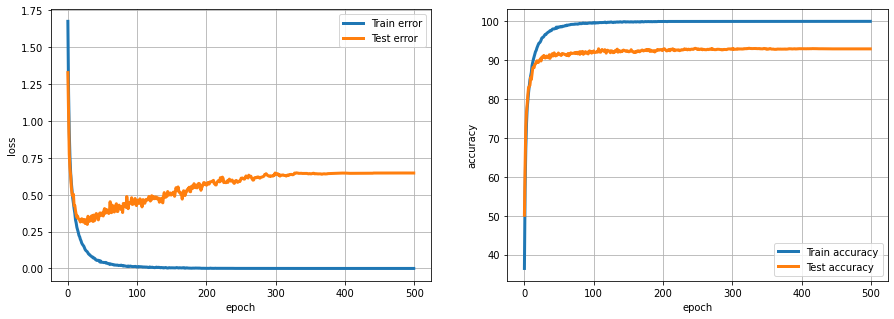

In [12]:
# num_epochs = 676
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [13]:
print('Accuracy:',sum(test_accuracy_history[-5:])/5)

Accuracy: 92.919921875
